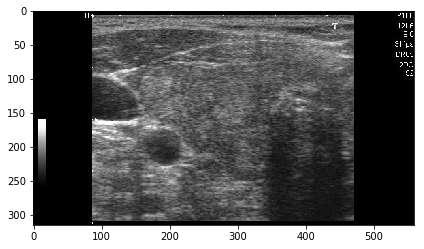

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import glob
import cv2
import numpy as np 	
import math
from matplotlib import pyplot as plt
from sklearn import svm, datasets
import os
import skimage
from skimage import io
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("data/benign/575_1.jpg")
img2 = cv2.imread("data/benign/577_2.jpg")
io.imshow(img)

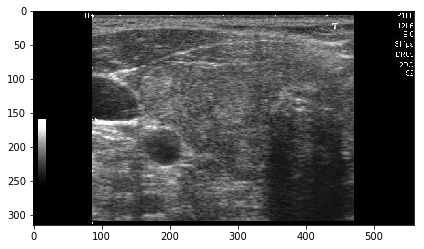

In [2]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
io.imshow(gray)

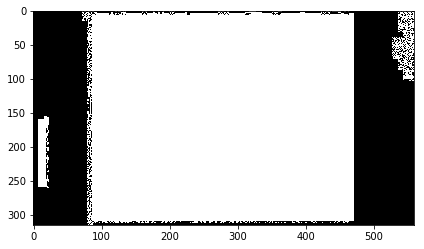

In [3]:
ret,thresh = cv2.threshold(gray,0,255,0)
io.imshow(thresh)

In [4]:
ret

0.0

In [5]:
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [7]:
print (len(contours))

685


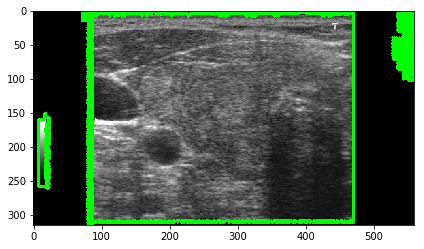

In [13]:
x = cv2.drawContours(img,contours,-1,(0,255,0),3)
io.imshow(x)

In [14]:
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cnt=contours[max_index]

In [15]:
x,y,w,h = cv2.boundingRect(cnt)

In [22]:
print(x,y,w,h)

72 0 400 315


In [24]:
# it's not the case for this problem
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [cnt],-1, 255, -1)
dst = cv2.bitwise_and(img, img, mask=mask)

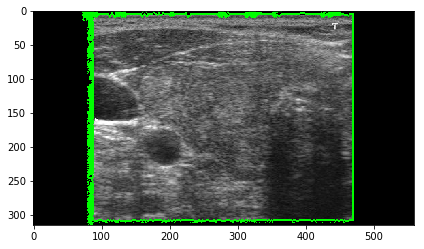

In [25]:
io.imshow(dst)

In [27]:
cv2.imwrite("dst.png", dst)

True

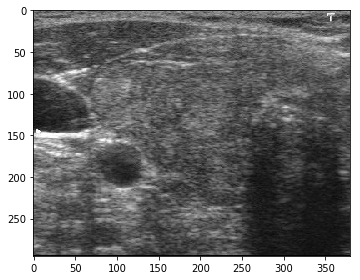

In [32]:
img = cv2.imread("data/benign/575_1.jpg")

crop_img = img[y+15:y+h-5,x+15:x+w-5]
# crop_img = img[y:y+h, x:x+w]
io.imshow(crop_img)